# Session 1 - DataFrames - Lesson 12: Data Visualization with Pandas

## Learning Objectives
- Learn to create plots directly from pandas DataFrames
- Master different types of visualizations (line, bar, scatter, histogram, etc.)
- Understand customization options for pandas plots
- Practice with real-world visualization scenarios
- Learn when to use pandas vs matplotlib/seaborn

## Prerequisites
- Completed previous lessons on DataFrames
- Basic understanding of data analysis concepts
- matplotlib will be used as the backend

In [52]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style and pandas plotting backend
plt.style.use('seaborn-v0_8')
pd.plotting.register_matplotlib_converters()

# Display settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Creating Sample Datasets

Let's create multiple datasets for different visualization examples.

In [53]:
# Sales dataset
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=100, freq='D')
sales_data = {
    'Date': dates,
    'Product': np.random.choice(['Laptop', 'Phone', 'Tablet', 'Monitor'], 100),
    'Sales': np.random.normal(1000, 200, 100).astype(int),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 100),
    'Salesperson': np.random.choice(['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'], 100)
}
df_sales = pd.DataFrame(sales_data)
df_sales['Sales'] = np.abs(df_sales['Sales'])  # Ensure positive values

# Stock prices dataset
stock_dates = pd.date_range('2024-01-01', periods=90, freq='D')
stock_data = {
    'Date': stock_dates,
    'AAPL': 150 + np.cumsum(np.random.normal(0, 2, 90)),
    'GOOGL': 120 + np.cumsum(np.random.normal(0, 1.5, 90)),
    'MSFT': 300 + np.cumsum(np.random.normal(0, 3, 90)),
    'TSLA': 200 + np.cumsum(np.random.normal(0, 5, 90))
}
df_stocks = pd.DataFrame(stock_data)
df_stocks.set_index('Date', inplace=True)

print("Sample datasets created:")
print(f"Sales data: {df_sales.shape}")
print(f"Stock data: {df_stocks.shape}")
print("\nSales data preview:")
print(df_sales.head())

Sample datasets created:
Sales data: (100, 5)
Stock data: (90, 4)

Sales data preview:
        Date  Product  Sales Region Salesperson
0 2024-01-01   Tablet   1147  South     Charlie
1 2024-01-02  Monitor   1034   West       Diana
2 2024-01-03   Laptop    976  North     Charlie
3 2024-01-04   Tablet    939   West       Alice
4 2024-01-05   Tablet    704   West       Alice


## 1. Basic Line Plots

Line plots are perfect for time series data and showing trends.

Basic line plot of stock prices:


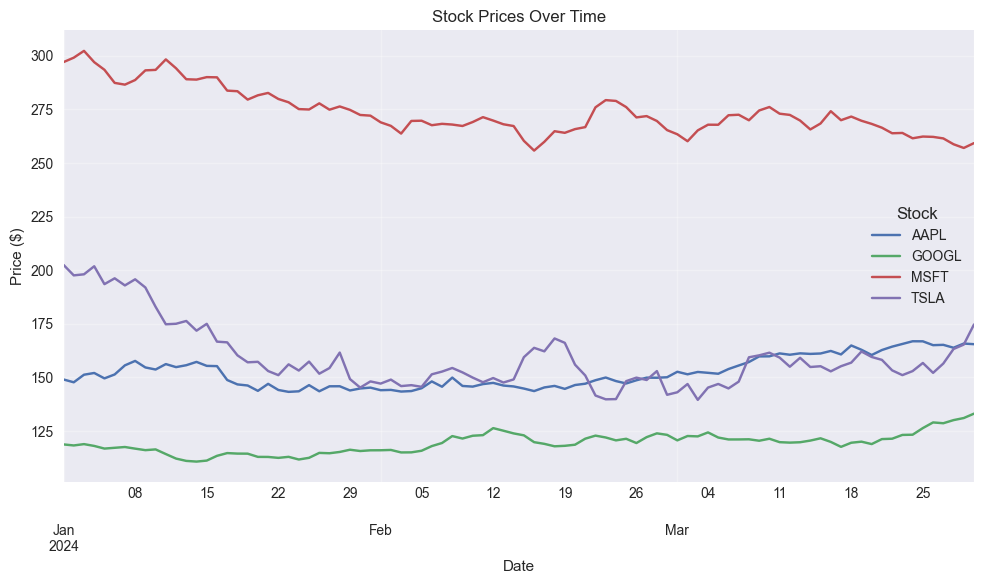


Single stock line plot:


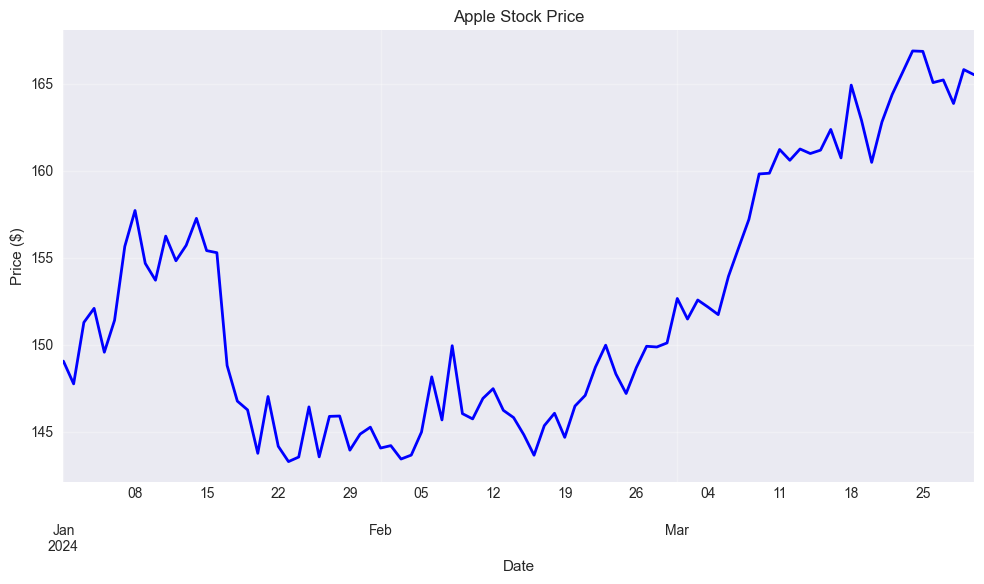

In [54]:
# Simple line plot
print("Basic line plot of stock prices:")
df_stocks.plot()
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(title='Stock')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Single column line plot
print("\nSingle stock line plot:")
df_stocks['AAPL'].plot(color='blue', linewidth=2)
plt.title('Apple Stock Price')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

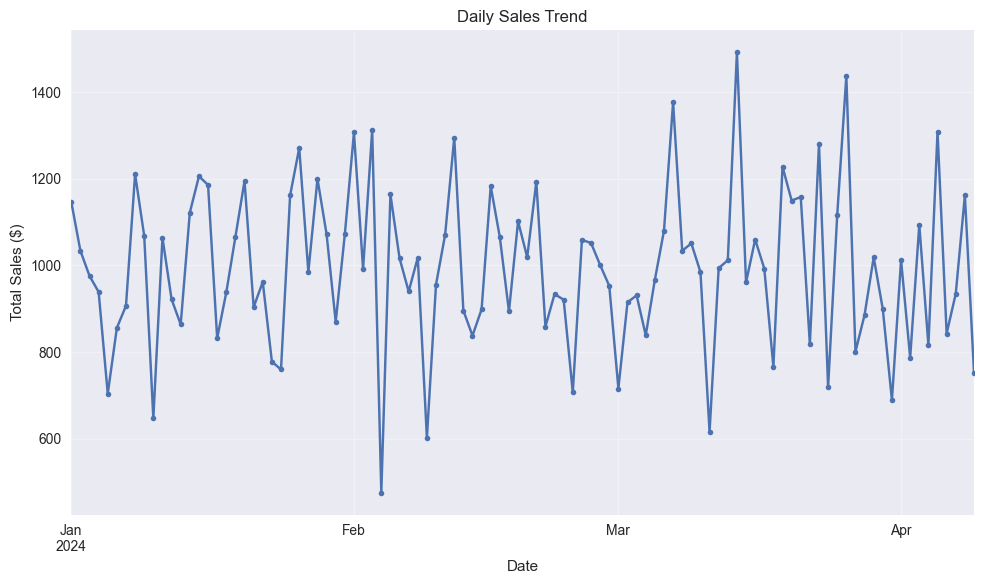


Daily sales with 7-day rolling average:


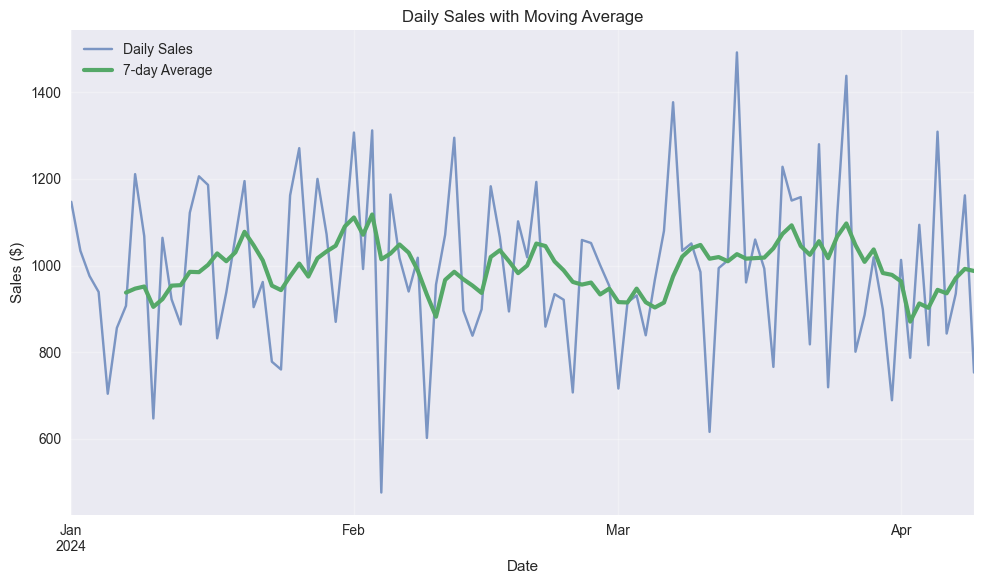

In [55]:
# Daily sales trend
daily_sales = df_sales.groupby('Date')['Sales'].sum()

daily_sales.plot(kind='line', marker='o', markersize=4)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Rolling average
print("\nDaily sales with 7-day rolling average:")
daily_sales.plot(label='Daily Sales', alpha=0.7)
daily_sales.rolling(window=7).mean().plot(label='7-day Average', linewidth=3)
plt.title('Daily Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Bar Charts

Bar charts are excellent for comparing categories.

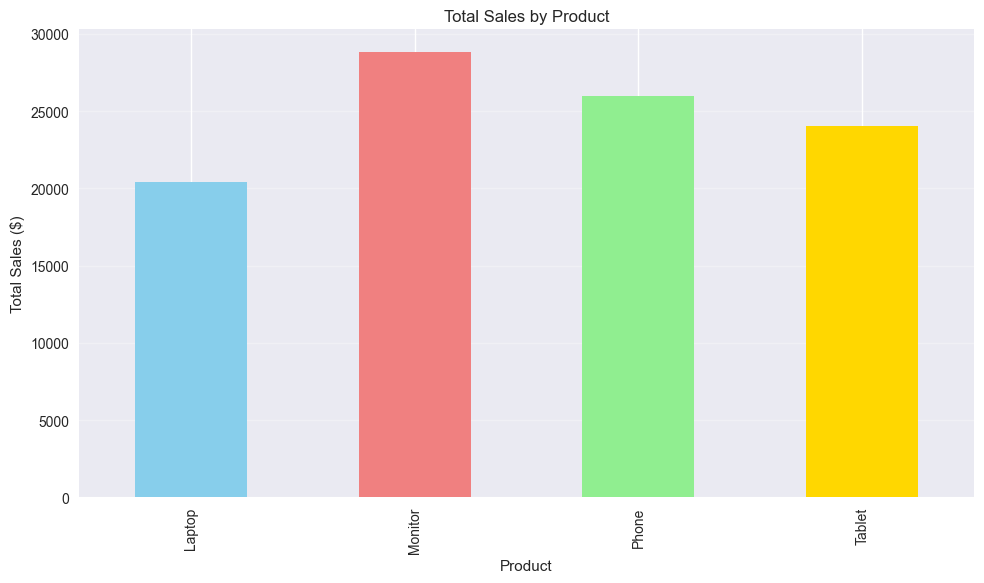


Horizontal bar chart:


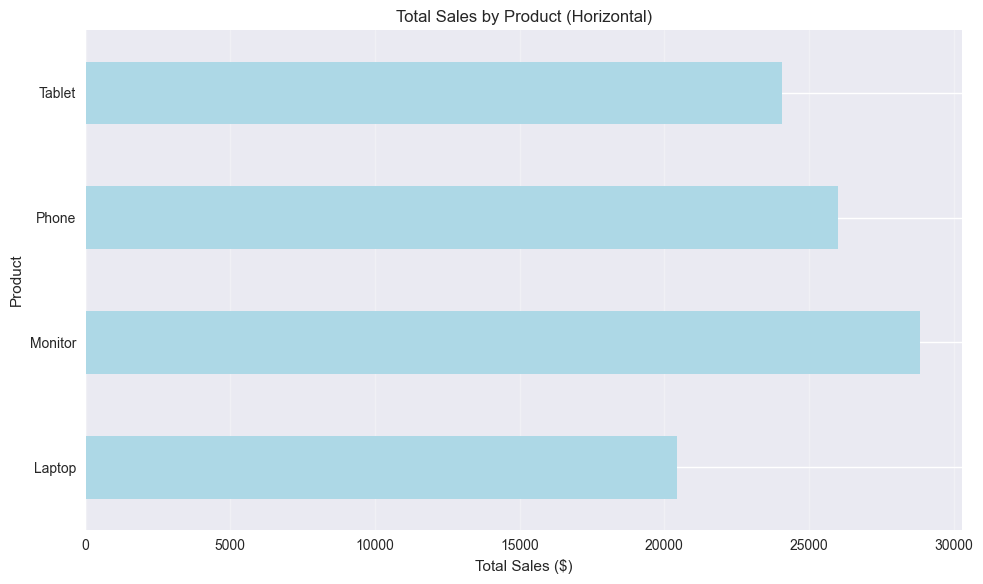

In [56]:
# Product sales comparison
product_sales = df_sales.groupby('Product')['Sales'].sum()

product_sales.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Horizontal bar chart
print("\nHorizontal bar chart:")
product_sales.plot(kind='barh', color='lightblue')
plt.title('Total Sales by Product (Horizontal)')
plt.xlabel('Total Sales ($)')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

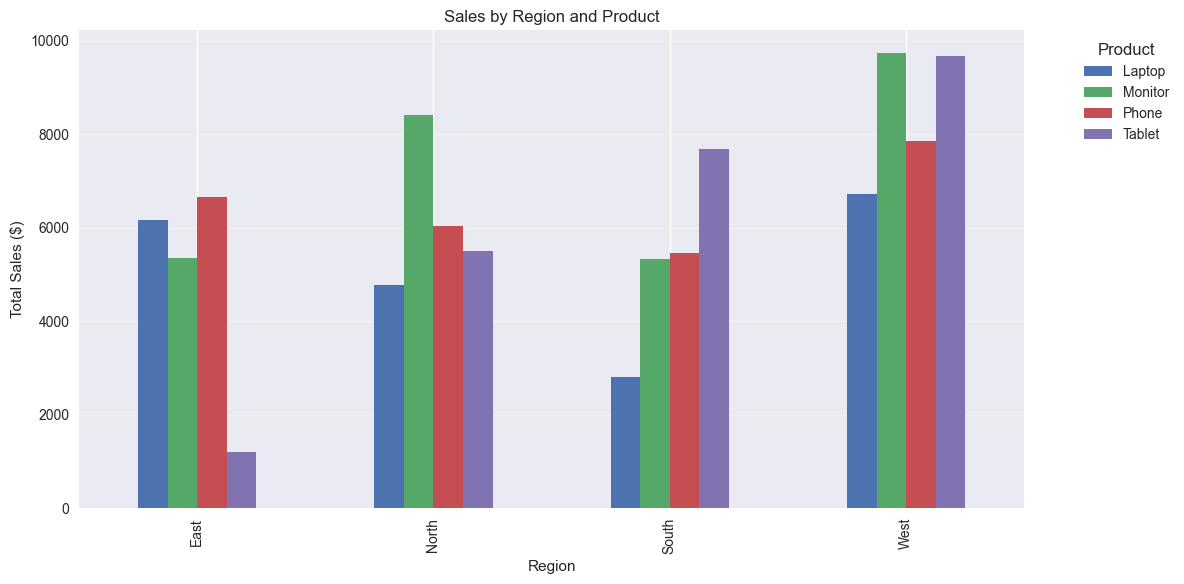


Stacked bar chart:


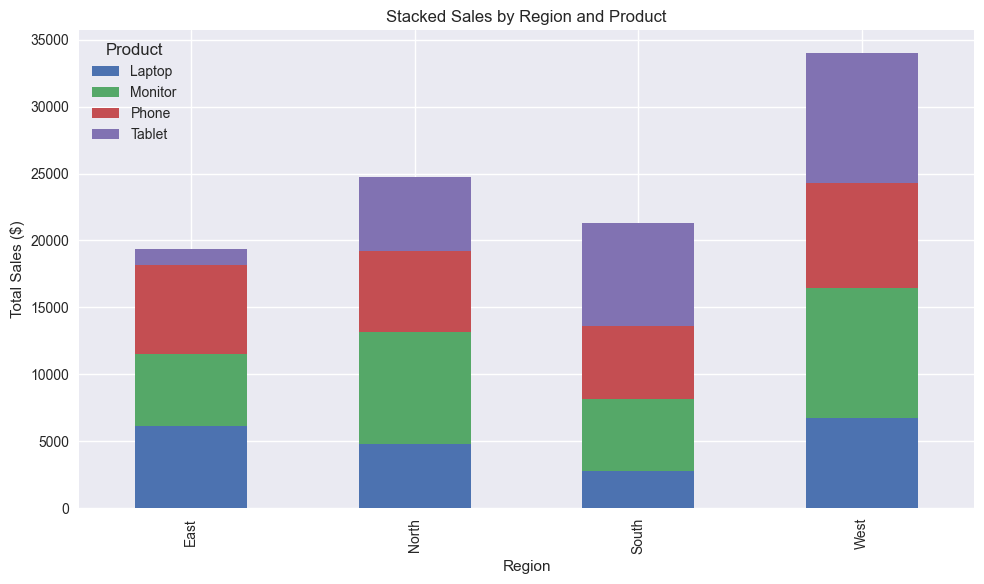

In [57]:
# Grouped bar chart
region_product = df_sales.groupby(['Region', 'Product'])['Sales'].sum().unstack()

region_product.plot(kind='bar', figsize=(12, 6))
plt.title('Sales by Region and Product')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Stacked bar chart
print("\nStacked bar chart:")
region_product.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Sales by Region and Product')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product')
plt.tight_layout()
plt.show()

## 3. Histograms and Distribution Plots

Understand the distribution of your numerical data.

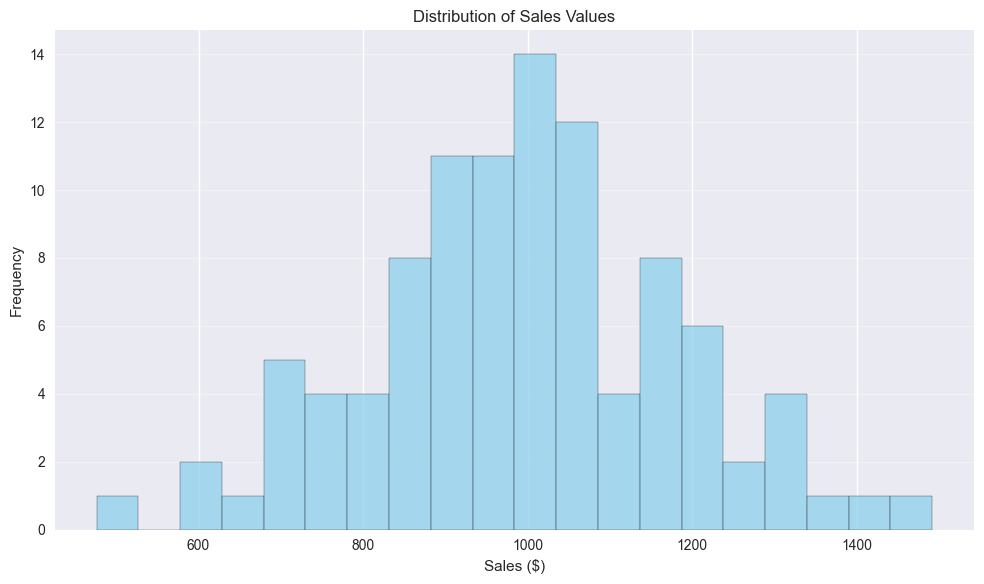


Histograms by product:


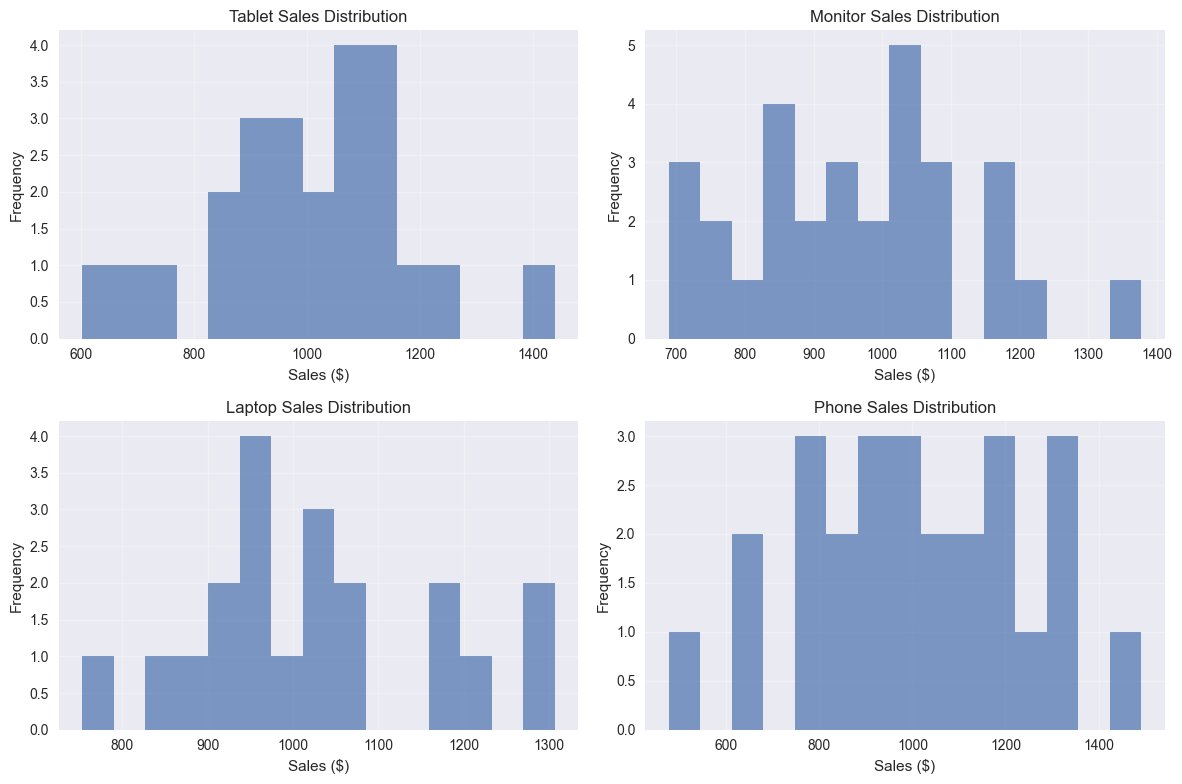

In [58]:
# Basic histogram
df_sales['Sales'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales Values')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Multiple histograms
print("\nHistograms by product:")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
products = df_sales['Product'].unique()

for i, product in enumerate(products):
    ax = axes[i//2, i%2]
    product_data = df_sales[df_sales['Product'] == product]['Sales']
    product_data.plot(kind='hist', bins=15, alpha=0.7, ax=ax, title=f'{product} Sales Distribution')
    ax.set_xlabel('Sales ($)')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

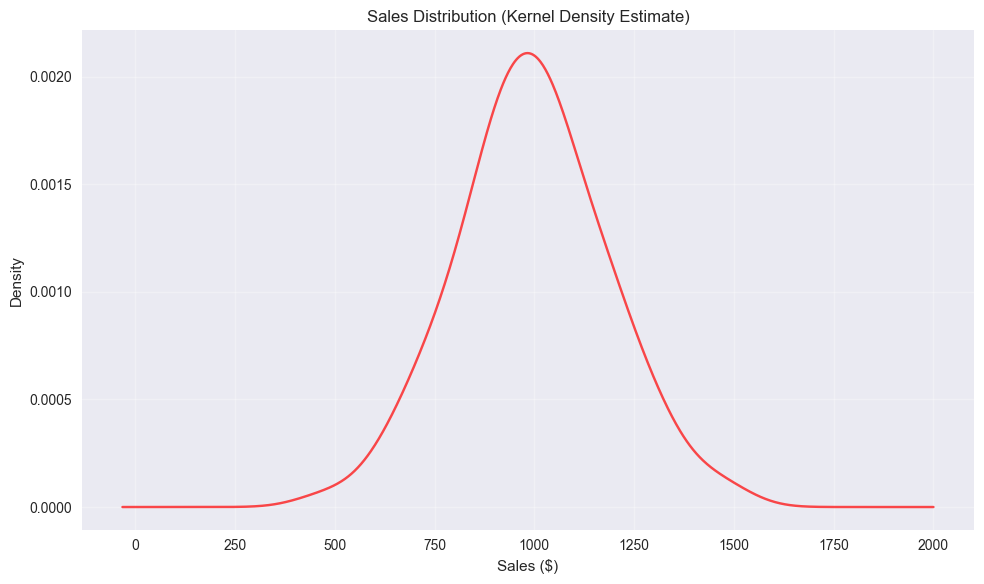


Combined histogram and density plot:


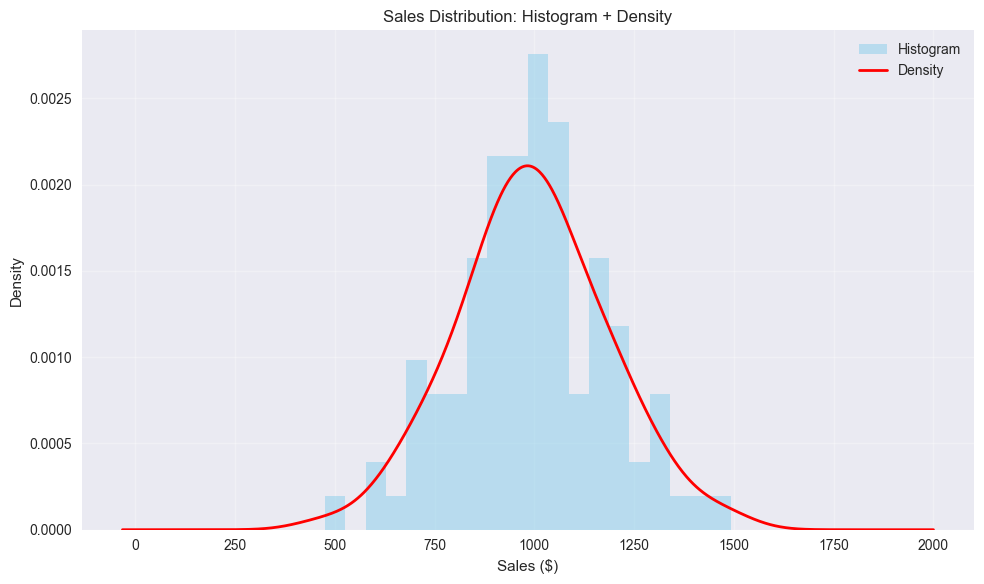

In [59]:
# Density plot (KDE)
df_sales['Sales'].plot(kind='density', alpha=0.7, color='red')
plt.title('Sales Distribution (Kernel Density Estimate)')
plt.xlabel('Sales ($)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Combined histogram and density
print("\nCombined histogram and density plot:")
ax = df_sales['Sales'].plot(kind='hist', bins=20, alpha=0.5, color='skyblue', 
                           density=True, label='Histogram')
df_sales['Sales'].plot(kind='density', ax=ax, color='red', linewidth=2, label='Density')
plt.title('Sales Distribution: Histogram + Density')
plt.xlabel('Sales ($)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Box Plots

Box plots show distribution quartiles and outliers.

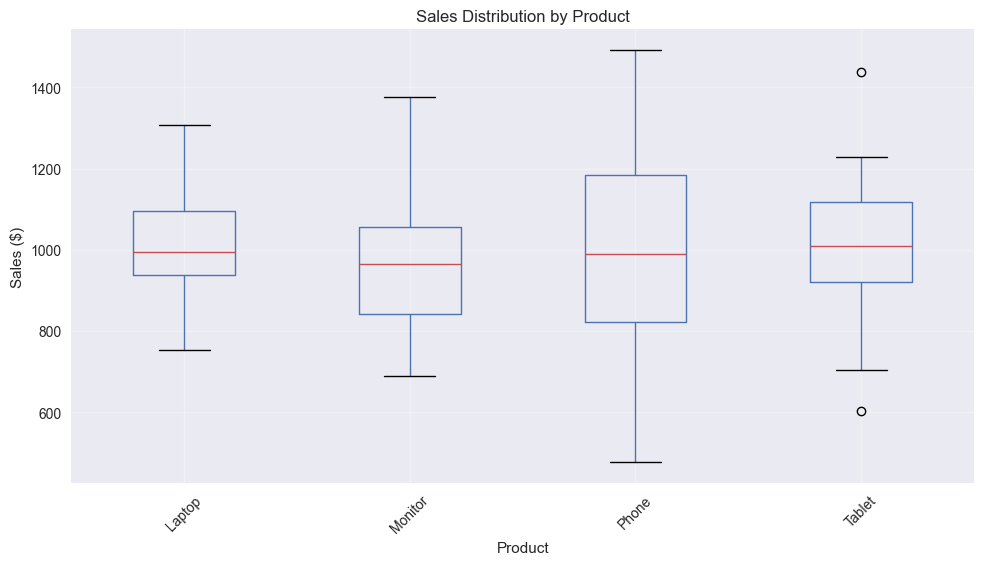


Box plots by region:


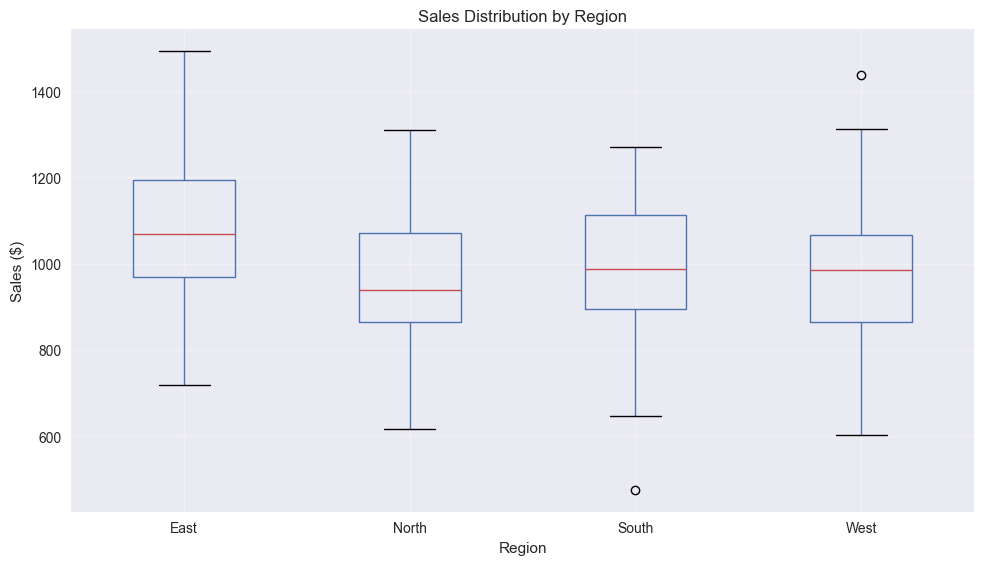

In [60]:
# Basic box plot
df_sales.boxplot(column='Sales', by='Product', figsize=(10, 6))
plt.title('Sales Distribution by Product')
plt.suptitle('')  # Remove default title
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Multiple box plots
print("\nBox plots by region:")
df_sales.boxplot(column='Sales', by='Region', figsize=(10, 6))
plt.title('Sales Distribution by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

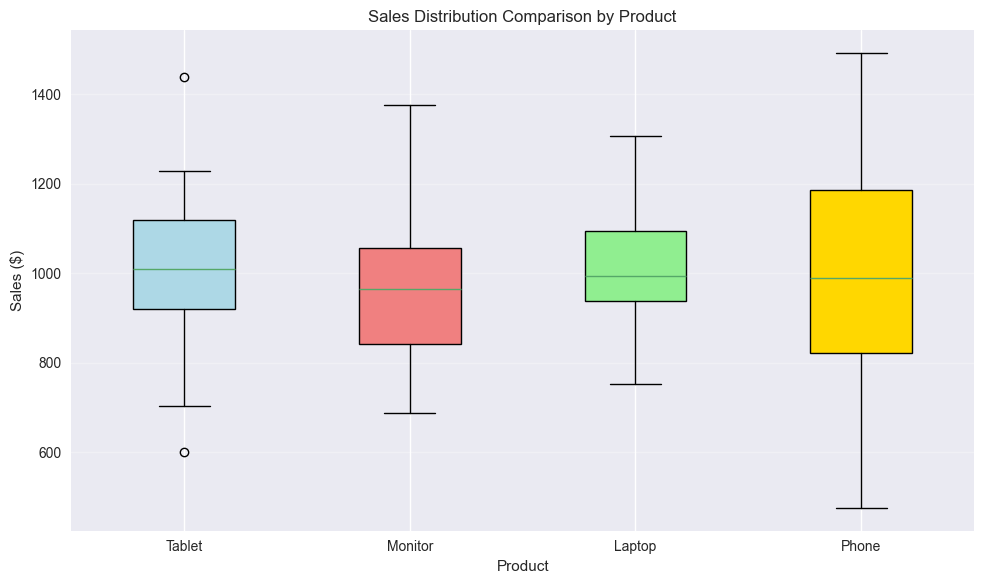

In [61]:
# Side-by-side box plots
sales_by_product = [df_sales[df_sales['Product'] == product]['Sales'] for product in df_sales['Product'].unique()]

plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(sales_by_product, labels=df_sales['Product'].unique(), patch_artist=True)

# Customize colors
colors = ['lightblue', 'lightcoral', 'lightgreen', 'gold']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Sales Distribution Comparison by Product')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 5. Scatter Plots

Explore relationships between numerical variables.

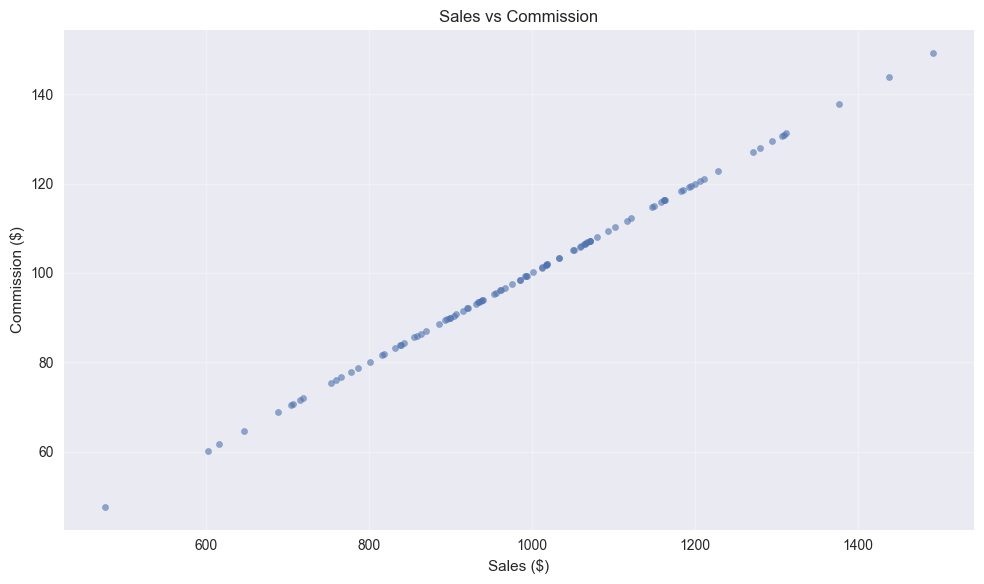


Scatter plot colored by category:


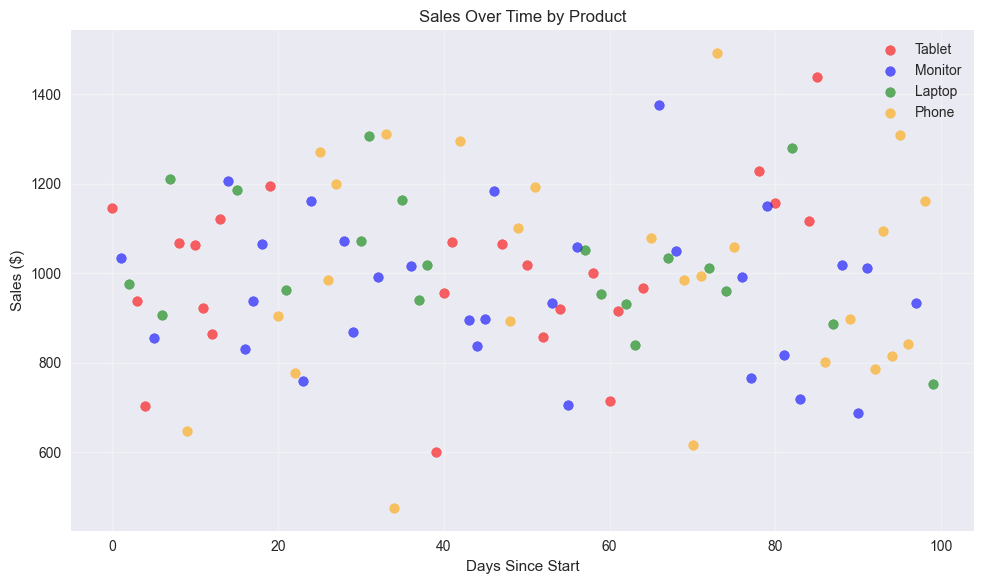

In [62]:
# Create additional numerical column for scatter plot
df_sales['Days_Since_Start'] = (df_sales['Date'] - df_sales['Date'].min()).dt.days
df_sales['Commission'] = df_sales['Sales'] * 0.1  # Assume 10% commission

# Basic scatter plot
df_sales.plot(kind='scatter', x='Sales', y='Commission', alpha=0.6, figsize=(10, 6))
plt.title('Sales vs Commission')
plt.xlabel('Sales ($)')
plt.ylabel('Commission ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Colored scatter plot
print("\nScatter plot colored by category:")
products = df_sales['Product'].unique()
colors = ['red', 'blue', 'green', 'orange']

plt.figure(figsize=(10, 6))
for product, color in zip(products, colors):
    product_data = df_sales[df_sales['Product'] == product]
    plt.scatter(product_data['Days_Since_Start'], product_data['Sales'], 
               c=color, label=product, alpha=0.6)

plt.title('Sales Over Time by Product')
plt.xlabel('Days Since Start')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

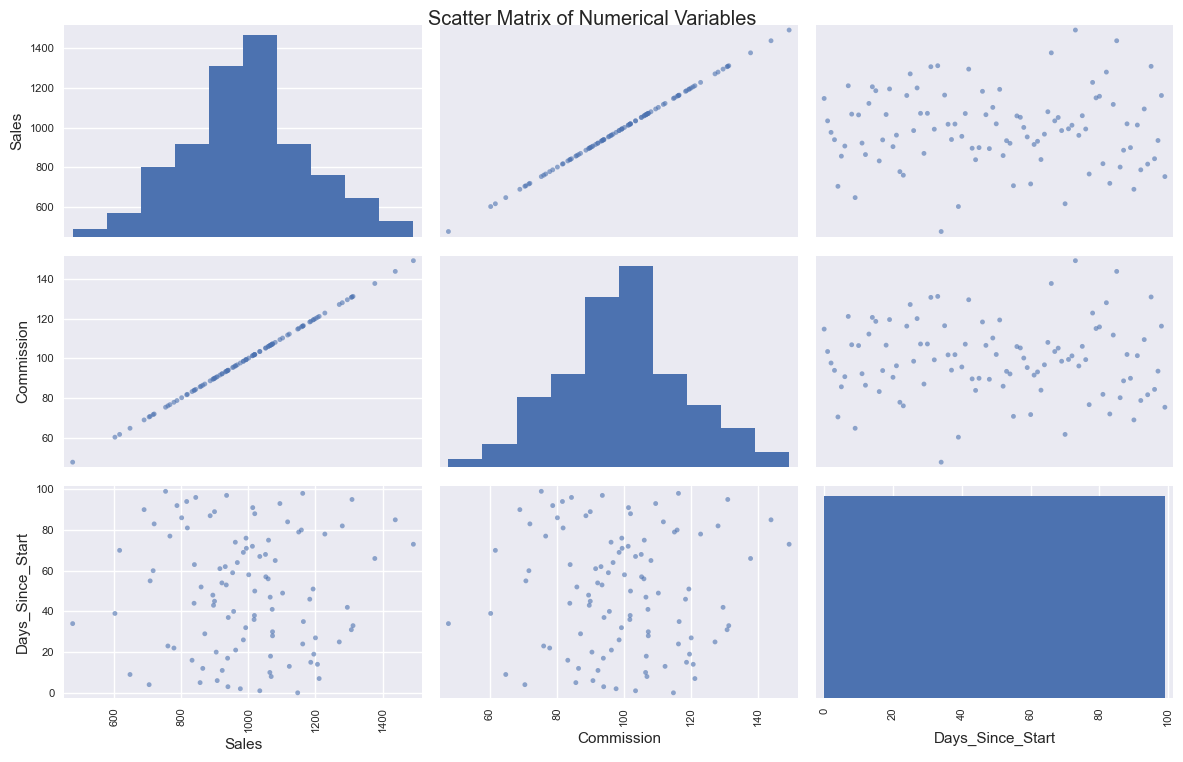

In [63]:
# Scatter matrix (pairs plot)
numerical_cols = ['Sales', 'Commission', 'Days_Since_Start']
pd.plotting.scatter_matrix(df_sales[numerical_cols], figsize=(12, 8), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Matrix of Numerical Variables', y=0.95)
plt.tight_layout()
plt.show()

## 6. Area Plots

Area plots show cumulative totals and proportions.

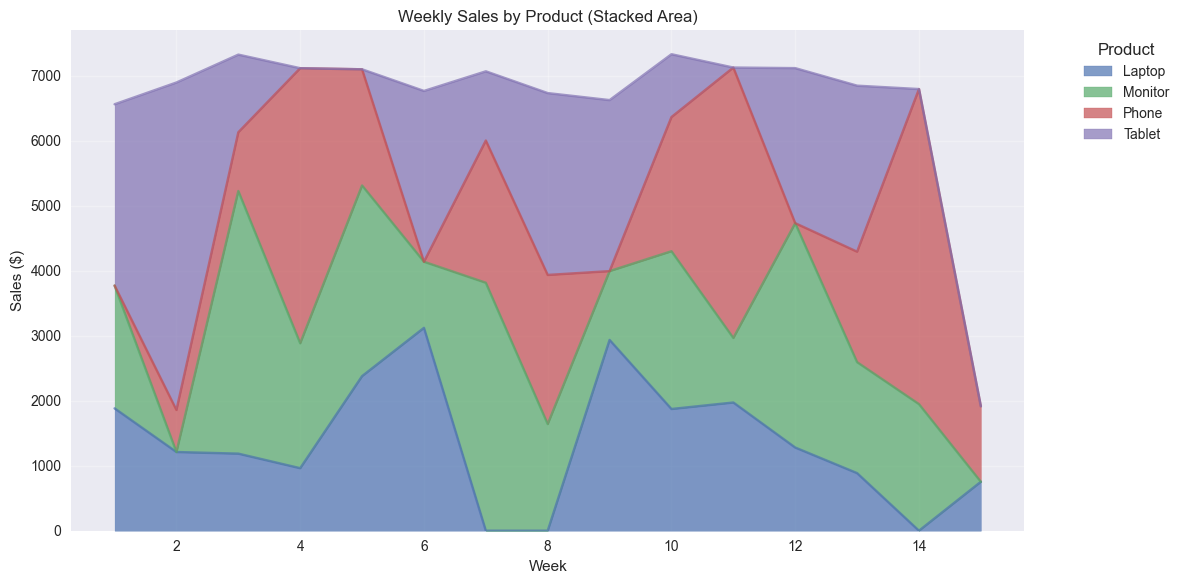


Percentage area plot:


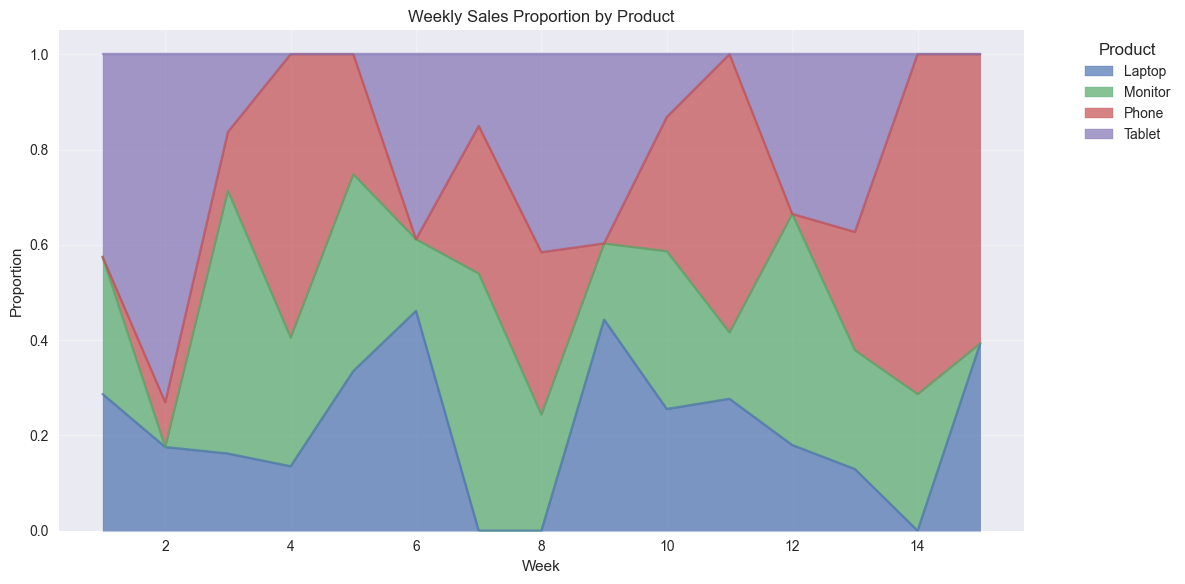

In [64]:
# Weekly sales by product (area plot)
df_sales['Week'] = df_sales['Date'].dt.isocalendar().week
weekly_product_sales = df_sales.groupby(['Week', 'Product'])['Sales'].sum().unstack(fill_value=0)

weekly_product_sales.plot(kind='area', figsize=(12, 6), alpha=0.7)
plt.title('Weekly Sales by Product (Stacked Area)')
plt.xlabel('Week')
plt.ylabel('Sales ($)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Percentage area plot
print("\nPercentage area plot:")
weekly_product_pct = weekly_product_sales.div(weekly_product_sales.sum(axis=1), axis=0)
weekly_product_pct.plot(kind='area', figsize=(12, 6), alpha=0.7)
plt.title('Weekly Sales Proportion by Product')
plt.xlabel('Week')
plt.ylabel('Proportion')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Pie Charts

Show proportions of a whole.

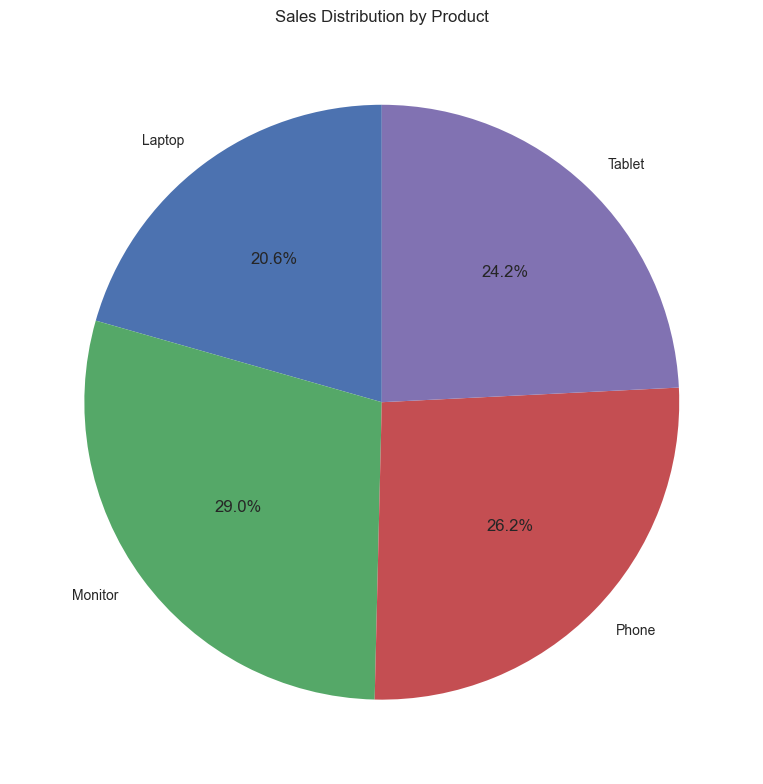


Customized pie chart:


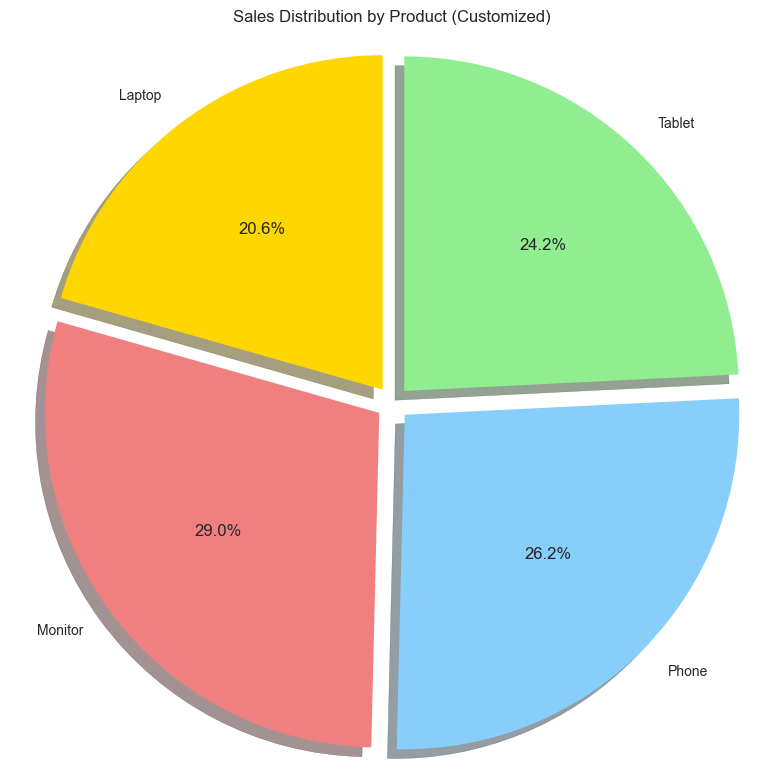

In [65]:
# Basic pie chart
product_sales = df_sales.groupby('Product')['Sales'].sum()

product_sales.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Product')
plt.ylabel('')  # Remove y-label
plt.tight_layout()
plt.show()

# Customized pie chart
print("\nCustomized pie chart:")
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.05, 0.05, 0.05, 0.05)  # Slightly separate all slices

plt.figure(figsize=(8, 8))
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Sales Distribution by Product (Customized)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 8. Subplots and Multiple Visualizations

Create dashboard-style layouts with multiple plots.

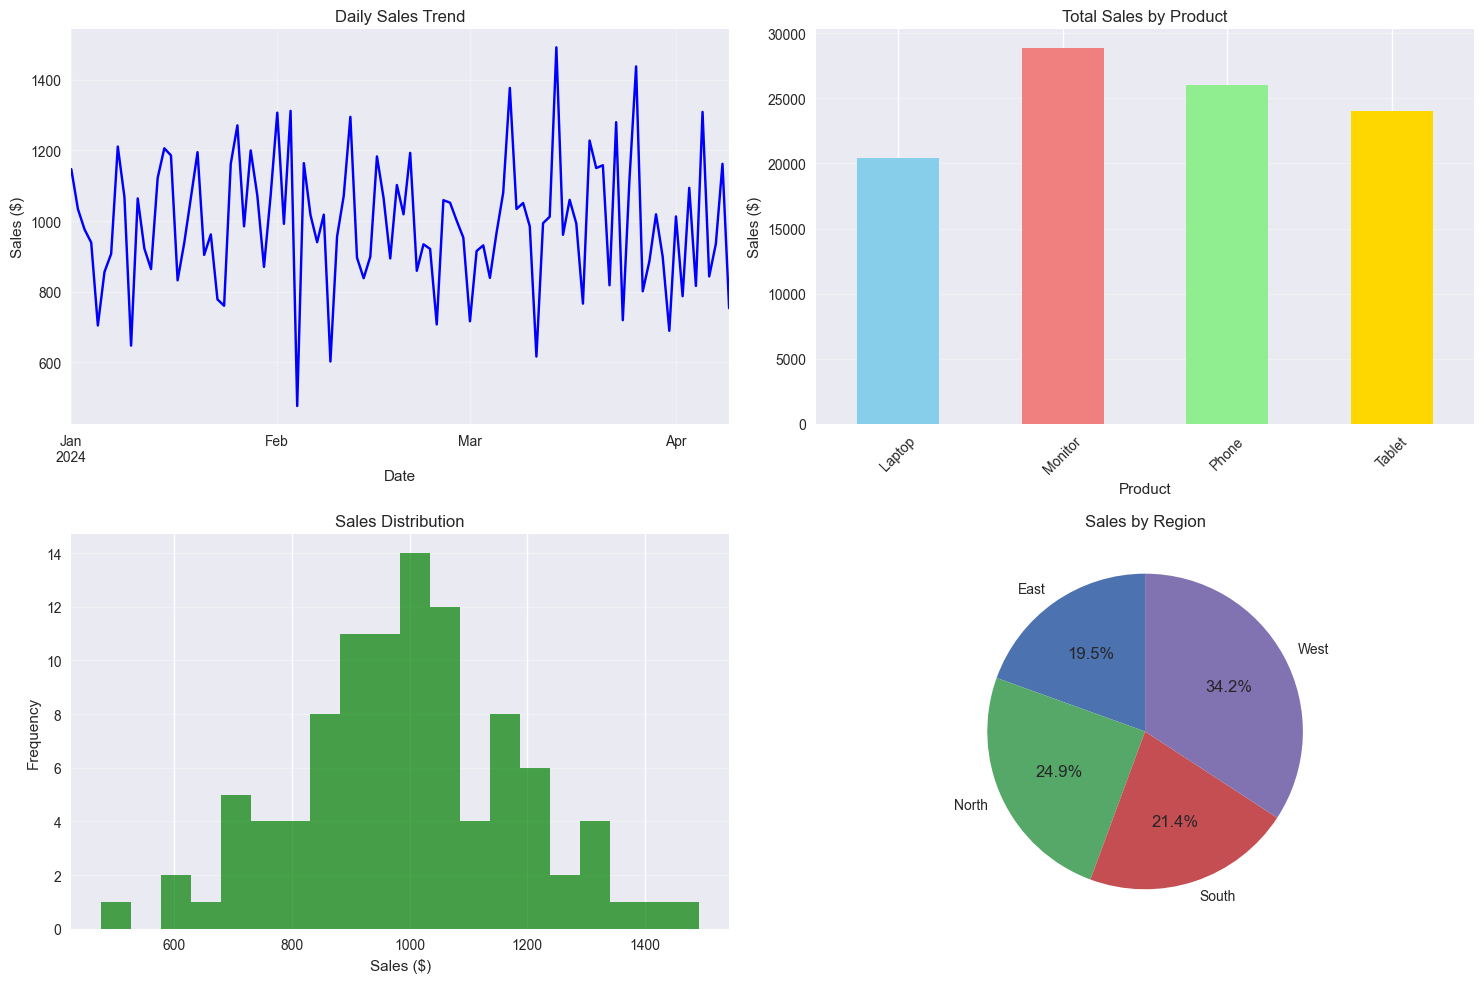

In [66]:
# Create a dashboard with multiple plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Daily sales trend
daily_sales = df_sales.groupby('Date')['Sales'].sum()
daily_sales.plot(ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Daily Sales Trend')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Sales by product (bar chart)
product_sales = df_sales.groupby('Product')['Sales'].sum()
product_sales.plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0, 1].set_title('Total Sales by Product')
axes[0, 1].set_xlabel('Product')
axes[0, 1].set_ylabel('Sales ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Sales distribution (histogram)
df_sales['Sales'].plot(kind='hist', bins=20, ax=axes[1, 0], alpha=0.7, color='green')
axes[1, 0].set_title('Sales Distribution')
axes[1, 0].set_xlabel('Sales ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Sales by region (pie chart)
region_sales = df_sales.groupby('Region')['Sales'].sum()
axes[1, 1].pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Sales by Region')

plt.tight_layout()
plt.show()

## 9. Advanced Plotting Techniques

More sophisticated visualization techniques.

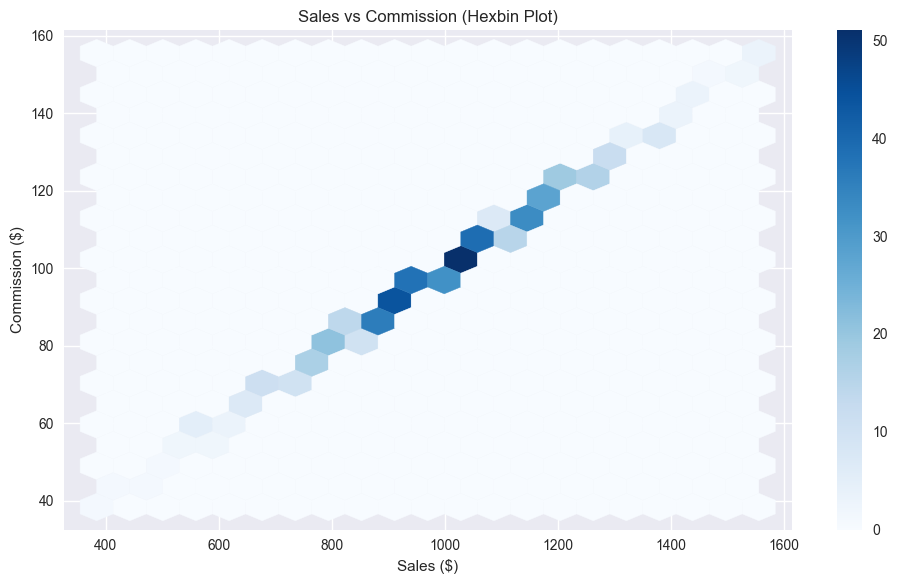

In [67]:
# Hexbin plot for dense scatter data
# Create more data points for better hexbin visualization
large_df = pd.concat([df_sales] * 5, ignore_index=True)
large_df['Sales'] += np.random.normal(0, 50, len(large_df))
large_df['Commission'] = large_df['Sales'] * 0.1

large_df.plot(kind='hexbin', x='Sales', y='Commission', gridsize=20, figsize=(10, 6), cmap='Blues')
plt.title('Sales vs Commission (Hexbin Plot)')
plt.xlabel('Sales ($)')
plt.ylabel('Commission ($)')
plt.tight_layout()
plt.show()


## 10. Customization and Styling

Make your plots look professional and publication-ready.

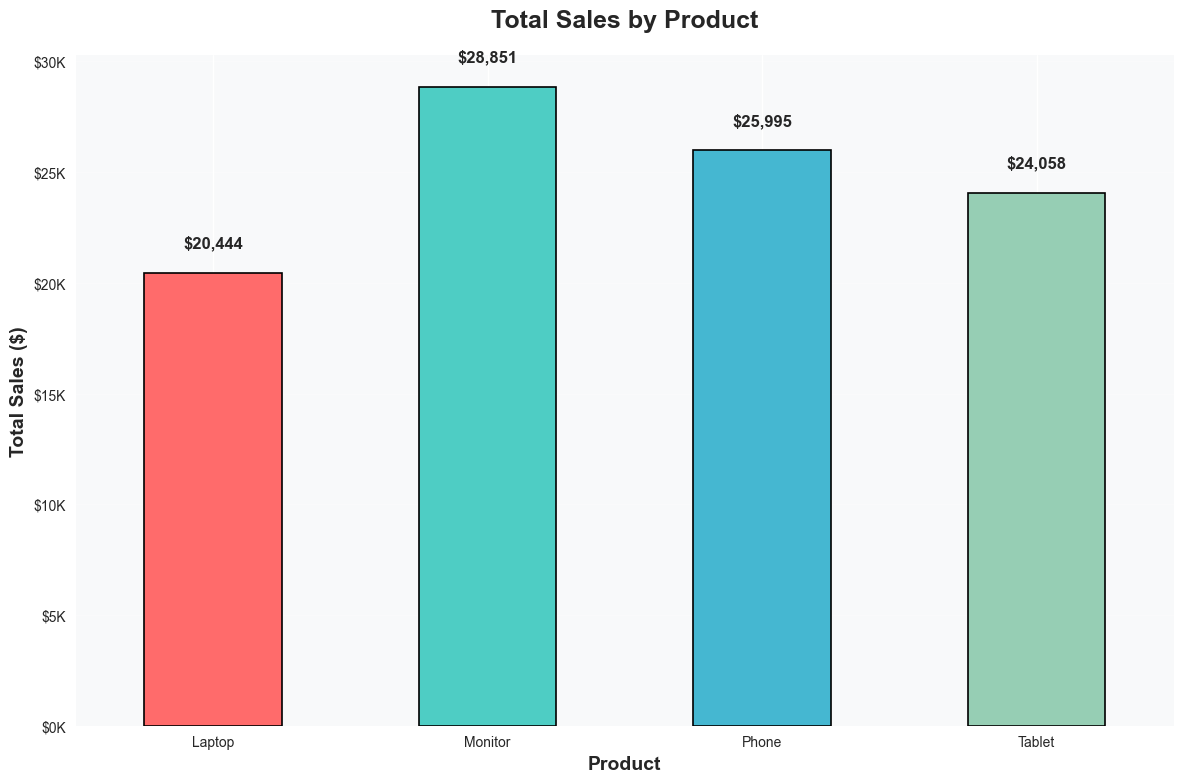

In [68]:
# Highly customized plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create the plot
product_sales = df_sales.groupby('Product')['Sales'].sum()
bars = product_sales.plot(kind='bar', ax=ax, 
                         color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'],
                         edgecolor='black', linewidth=1.2)

# Customize the plot
ax.set_title('Total Sales by Product', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Product', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Sales ($)', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3, axis='y')
ax.set_facecolor('#F8F9FA')
plt.xticks(rotation=0)

# Format y-axis to show values in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

## Practice Exercises

Apply your visualization skills to real scenarios:

In [69]:
# Exercise 1: Create a comprehensive sales dashboard
# Include: time series, comparison charts, distribution, and proportions
# Make it publication-ready with proper titles, labels, and styling

# Your code here:
def create_sales_dashboard(df):
    """Create a comprehensive sales dashboard"""
    # Your implementation here
    pass

# create_sales_dashboard(df_sales)

In [70]:
# Exercise 2: Stock performance analysis
# Create visualizations to compare stock performance:
# - Price movements over time
# - Daily returns distribution
# - Correlation analysis
# - Risk vs return scatter plot

# Your code here:


In [71]:
# Exercise 3: Advanced time series visualization
# Create a plot that shows:
# - Original time series
# - Trend line
# - Seasonal decomposition
# - Confidence intervals

# Your code here:


## Key Takeaways

1. **Pandas Integration**: Direct plotting from DataFrames is convenient and powerful
2. **Plot Types**: Choose the right visualization for your data type and message
3. **Customization**: Always add titles, labels, and legends for clarity
4. **Color and Style**: Use consistent, accessible color schemes
5. **Subplots**: Combine multiple views for comprehensive analysis
6. **Data Preparation**: Clean and prepare data before visualizing
7. **Interactivity**: Consider interactive plots for exploration

## Plot Type Quick Reference

| Data Type | Best Plot Type | Pandas Method |
|-----------|---------------|---------------|
| Time Series | Line Plot | `.plot()` or `.plot(kind='line')` |
| Categories | Bar Chart | `.plot(kind='bar')` |
| Distribution | Histogram | `.plot(kind='hist')` |
| Relationships | Scatter Plot | `.plot(kind='scatter')` |
| Proportions | Pie Chart | `.plot(kind='pie')` |
| Comparisons | Box Plot | `.boxplot()` |
| Cumulative | Area Plot | `.plot(kind='area')` |

## Best Practices

1. **Start Simple**: Begin with basic plots, then add complexity
2. **Tell a Story**: Each plot should convey a clear message
3. **Consider Your Audience**: Adjust complexity and detail accordingly
4. **Use Consistent Styling**: Maintain visual consistency across plots
5. **Test Different Views**: Try multiple plot types for the same data
6. **Add Context**: Include benchmarks, targets, or reference lines
7. **Make it Accessible**: Use colorblind-friendly palettes